In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_data_origin=pd.read_csv("train.csv")
test_data_origin=pd.read_csv("test.csv")

In [6]:
train_data_origin.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("Train: X =",train_data_origin.shape)
print("Test: X =",test_data_origin.shape)

Train: X = (42000, 785)
Test: X = (28000, 784)


In [8]:
train_features,train_labels = train_data_origin.drop("label",axis=1).values.astype('float32'),train_data_origin["label"].values.astype('int32') 
test_features = test_data_origin.values.astype('float32')

In [9]:
print("Train: X =",train_features.shape,"Y =",train_labels.shape)
print("Test: X =",test_features.shape)

Train: X = (42000, 784) Y = (42000,)
Test: X = (28000, 784)


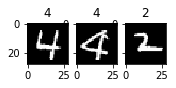

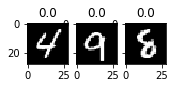

In [10]:
import random
train_features_images=train_features.reshape(train_features.shape[0],28,28)
test_features_images=test_features.reshape(test_features.shape[0],28,28)

def show_images(features_images,labels,length):
    start=42
    for i in range(start, start+length):
        plt.subplot(330 + (i+1))
        plt.imshow(features_images[i], cmap=plt.get_cmap('gray'))
        plt.title(labels[i])
    plt.show()
        
show_images(train_features_images,train_labels,3)
show_images(test_features_images,np.zeros(test_features_images.shape[0]),3)

In [11]:
mean_px = train_features.mean().astype(np.float32)
std_px = train_features.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

train_features_norm=standardize(train_features)
test_features_norm=standardize(test_features)

In [12]:
train_features_norm[:5]

array([[-0.4246309, -0.4246309, -0.4246309, ..., -0.4246309, -0.4246309,
        -0.4246309],
       [-0.4246309, -0.4246309, -0.4246309, ..., -0.4246309, -0.4246309,
        -0.4246309],
       [-0.4246309, -0.4246309, -0.4246309, ..., -0.4246309, -0.4246309,
        -0.4246309],
       [-0.4246309, -0.4246309, -0.4246309, ..., -0.4246309, -0.4246309,
        -0.4246309],
       [-0.4246309, -0.4246309, -0.4246309, ..., -0.4246309, -0.4246309,
        -0.4246309]], dtype=float32)

In [13]:
train_features_reshaped=train_features_norm.reshape(train_features_norm.shape[0],28,28,1)
test_features_reshaped=test_features_norm.reshape(test_features_norm.shape[0],28,28,1)

train_labels_reshaped=train_labels.reshape(train_features.shape[0],1)
train_labels_reshaped=np.eye(10)[train_labels]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train_features_reshaped, train_labels_reshaped, test_size=0.10)
X_test=test_features_reshaped

In [15]:
print("Train: X =",X_train.shape,"Y =",y_train.shape)
print("Validation: X =",X_validation.shape,"Y =",y_validation.shape)

Train: X = (37800, 28, 28, 1) Y = (37800, 10)
Validation: X = (4200, 28, 28, 1) Y = (4200, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flat

In [18]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=30,
          validation_data=(X_validation, y_validation), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 14s - loss: 0.1843 - acc: 0.9413 - val_loss: 0.0726 - val_acc: 0.9783

Epoch 00001: val_loss improved from inf to 0.07259, saving model to model.weights.best.hdf5
Epoch 2/30
 - 13s - loss: 0.0589 - acc: 0.9817 - val_loss: 0.0722 - val_acc: 0.9790

Epoch 00002: val_loss improved from 0.07259 to 0.07221, saving model to model.weights.best.hdf5
Epoch 3/30
 - 13s - loss: 0.0432 - acc: 0.9865 - val_loss: 0.0779 - val_acc: 0.9795

Epoch 00003: val_loss did not improve from 0.07221
Epoch 4/30
 - 13s - loss: 0.0350 - acc: 0.9890 - val_loss: 0.0753 - val_acc: 0.9840

Epoch 00004: val_loss did not improve from 0.07221
Epoch 5/30
 - 13s - loss: 0.0296 - acc: 0.9913 - val_loss: 0.1493 - val_acc: 0.9738

Epoch 00005: val_loss did not improve from 0.07221
Epoch 6/30
 - 15s - loss: 0.0243 - acc: 0.9924 - val_loss: 0.0861 - val_acc: 0.9821

Epoch 00006: val_loss did not improve from 0.07221
E

In [20]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [21]:
# evaluate and print test accuracy
score = model.evaluate(X_validation, y_validation, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9864285714285714


In [22]:
X_test.shape

(28000, 28, 28, 1)

In [23]:
y_hat = model.predict(X_test)

In [24]:
y_hat[:5]

array([[8.90784986e-20, 5.88800478e-18, 1.00000000e+00, 4.40129712e-15,
        5.19046949e-22, 5.30094207e-23, 1.09562351e-23, 2.21140142e-12,
        6.13218601e-18, 1.19990555e-16],
       [1.00000000e+00, 5.18252384e-19, 6.84131155e-11, 7.03968421e-18,
        3.48062971e-19, 3.19822754e-13, 1.37278935e-08, 4.70236312e-15,
        6.95820409e-13, 1.08205840e-11],
       [1.16892611e-16, 1.12795598e-15, 4.36271103e-10, 4.40413764e-14,
        2.24223862e-10, 3.91538608e-15, 7.54057766e-21, 2.48166557e-11,
        1.64849356e-09, 1.00000000e+00],
       [9.88587365e-02, 1.31320219e-14, 4.37714306e-07, 2.89205019e-07,
        2.68538213e-11, 1.25906423e-08, 1.44034225e-08, 7.26397664e-10,
        1.34098300e-04, 9.01006460e-01],
       [1.70026975e-18, 1.07061170e-14, 3.39286643e-09, 1.00000000e+00,
        1.96843477e-22, 1.28985405e-13, 2.20530067e-21, 3.43016834e-14,
        1.64873809e-10, 9.71855449e-14]], dtype=float32)

In [25]:
predict_labels=np.argmax(y_hat,axis=1)

In [26]:
import random
start=random.randint(0,len(X_test))
predict_labels[start:start+10]

array([8, 8, 2, 5, 4, 3, 7, 9, 4, 7])

In [27]:
evaluation= pd.DataFrame({'ImageId':np.arange(1,len(X_test)+1),'Label':predict_labels})
evaluation.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [28]:
evaluation.to_csv("evaluation_submission.csv",index=False)